In [19]:
# Imports
import spectral
import numpy as np
from pathlib import Path
import importlib 
import massimal.image_render
import massimal.hyspec_io
import matplotlib.pyplot as plt

import massimal.pipeline

In [14]:
importlib.reload(massimal.pipeline)

<module 'massimal.pipeline' from '/home/mha114/Dropbox/Python/massimal/src/massimal/pipeline.py'>

In [36]:
# Paths
radiance_cailbration_file = '/media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301228-south-test_hsi/calibration/RadiometricCal100121-278_081220.icp'
raw_image_file = Path('/media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301228-south-test_hsi/0_raw/OlbergholmenN-7/OlbergholmenN_Pika_L_7.bil.hdr')
radiance_dir = Path('/media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301228-south-test_hsi/1_radiance')
radiance_image_file = radiance_dir / raw_image_file.name

In [6]:
rd = massimal.pipeline.RadianceCalibrationDataset(radiance_cailbration_file)

INFO: Non-empty calibration directory /media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301228-south-test_hsi/calibration/radiance_calibration_frames
INFO: Skipping unzipping of calibration file, assuming unzipping already done.


In [7]:
dark_frame,wl,metadata,gain,shutter = rd.get_closest_dark_frame(gain=5,shutter=4.819)
print(metadata)

{'interleave': 'bip', 'lines': '1', 'samples': '900', 'bands': '600', 'data type': '12', 'shutter': '5', 'gain': '5.0', 'ceiling': '4095', 'sample binning': '1', 'spectral binning': '1', 'byte order': '0'}


In [8]:
rad_conv_frame,wl,metadata = rd.get_rad_conv_frame()

In [9]:
rad_conv_frame.shape

(1, 900, 600)

In [11]:
raw_image,wl,raw_image_metadata = massimal.pipeline.read_envi(raw_image_file)

In [15]:
rc = massimal.pipeline.RadianceConverter(radiance_calibration_file=radiance_cailbration_file)

INFO: Non-empty calibration directory /media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301228-south-test_hsi/calibration/radiance_calibration_frames
INFO: Skipping unzipping of calibration file, assuming unzipping already done.


In [16]:
rad_image = rc.convert_raw_image_to_radiance(raw_image,raw_image_metadata)

In [17]:
print(f'{rad_image.shape=}')
print(f'{np.min(raw_image)=}, {np.max(raw_image)=}')
print(f'{np.min(rad_image)=}, {np.max(rad_image)=}')

rad_image.shape=(2000, 900, 300)
np.min(raw_image)=0.0, np.max(raw_image)=2722.0
np.min(rad_image)=0, np.max(rad_image)=7515


In [32]:
importlib.reload(massimal.image_render)

<module 'massimal.image_render' from '/home/mha114/Dropbox/Python/massimal/src/massimal/image_render.py'>

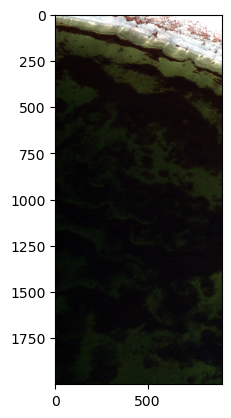

In [33]:
_ = plt.imshow(massimal.image_render.percentile_stretch(rad_image[:,:,(150,100,50)]))

In [35]:
rc.convert_raw_file_to_radiance(raw_image_file,radiance_image_file)

In [43]:
rad_spec_sand = np.mean(rad_image[0:10,890:899,:],axis=(0,1))

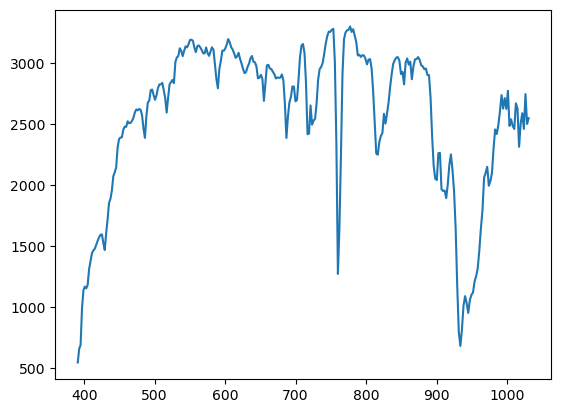

In [44]:
plt.plot(wl,rad_spec_sand)

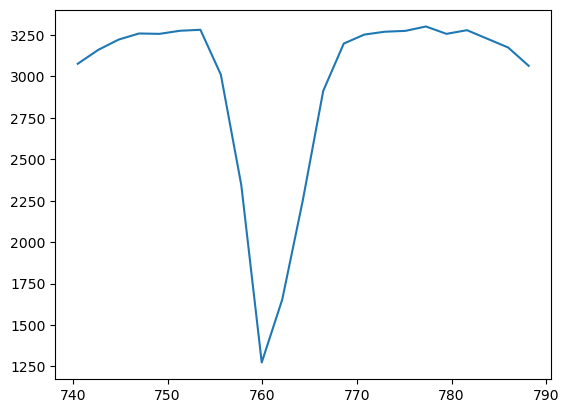

In [45]:
wl_ind = (wl>740) & (wl<790)
plt.plot(wl[wl_ind],rad_spec_sand[wl_ind])

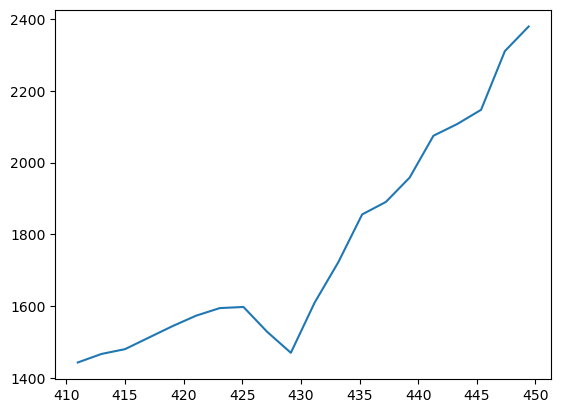

In [46]:
wl_ind = (wl>410) & (wl<450)
plt.plot(wl[wl_ind],rad_spec_sand[wl_ind])

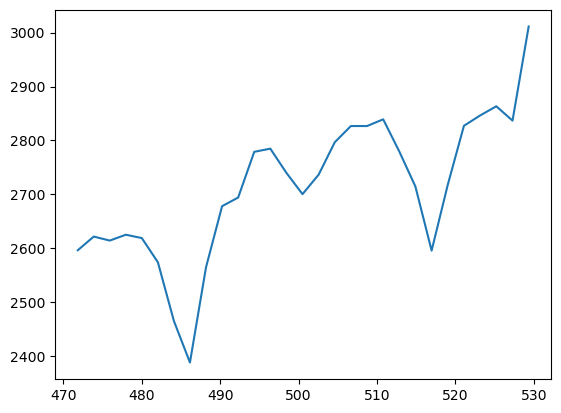

In [47]:
wl_ind = (wl>470) & (wl<530)
plt.plot(wl[wl_ind],rad_spec_sand[wl_ind])